# Importing the dependencies

In [214]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Reading the Dataset

In [215]:
titanic=pd.read_csv('train.csv')

# EDA

In [216]:
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [217]:
titanic.shape

(891, 12)

In [218]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [220]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [222]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [223]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [224]:
titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

# Visualizing the dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

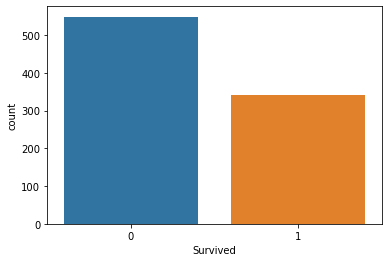

In [225]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='count'>

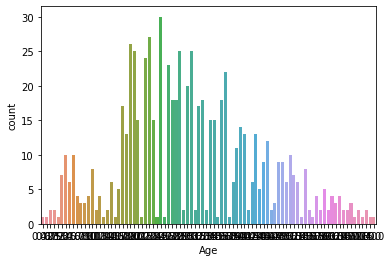

In [226]:
sns.countplot(x='Age',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

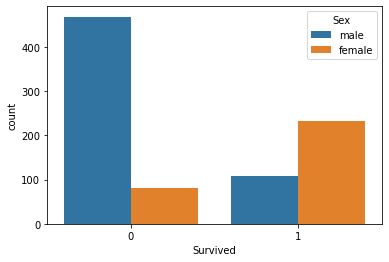

In [227]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

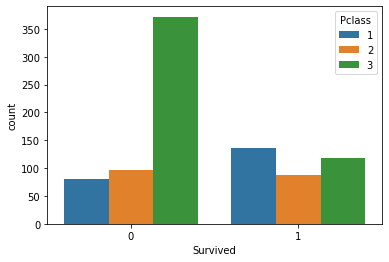

In [228]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

<AxesSubplot:ylabel='Frequency'>

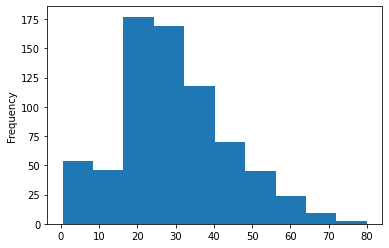

In [229]:
titanic['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

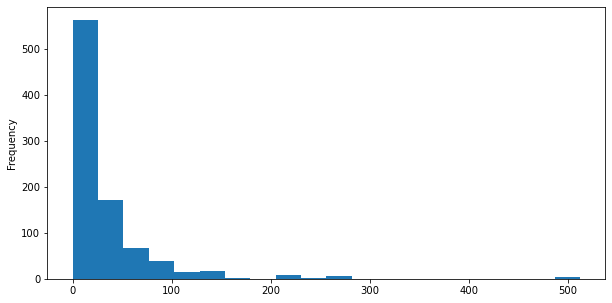

In [230]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

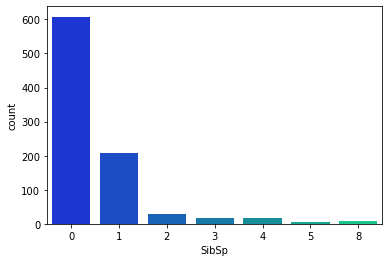

In [231]:
sns.countplot(x='SibSp',data=titanic,palette='winter')

<AxesSubplot:xlabel='Parch', ylabel='count'>

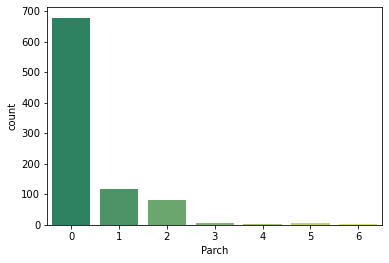

In [232]:
sns.countplot(x='Parch',data=titanic,palette='summer')

In [233]:
from scipy.stats import spearmanr
correlation_matrix = titanic.corr(method='pearson')
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


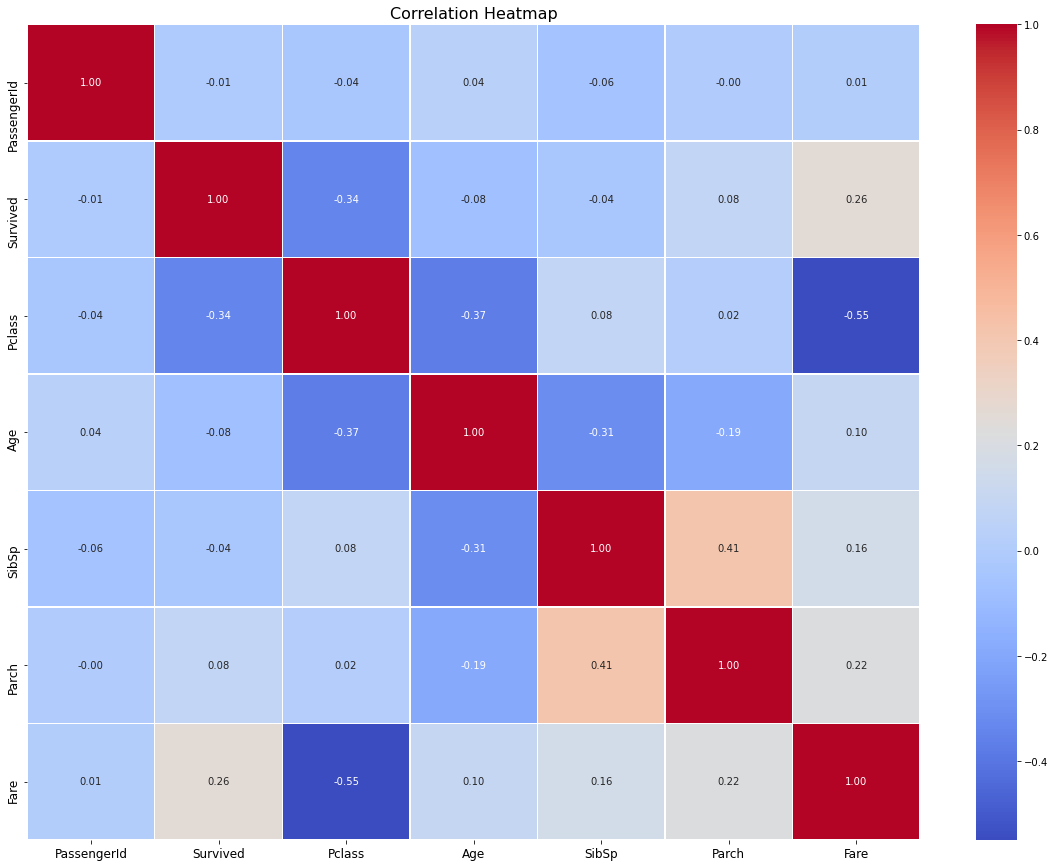

In [234]:
plt.figure(figsize=(20, 15))
plt.title("Correlation Heatmap", fontsize=20)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Data Wrangling

In [235]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [237]:
titanic.shape

(891, 12)

<AxesSubplot:>

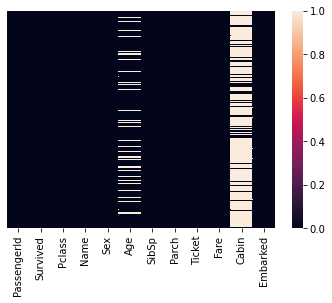

In [238]:
sns.heatmap(titanic.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

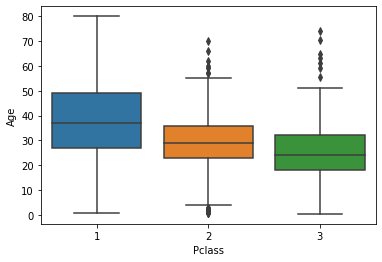

In [239]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

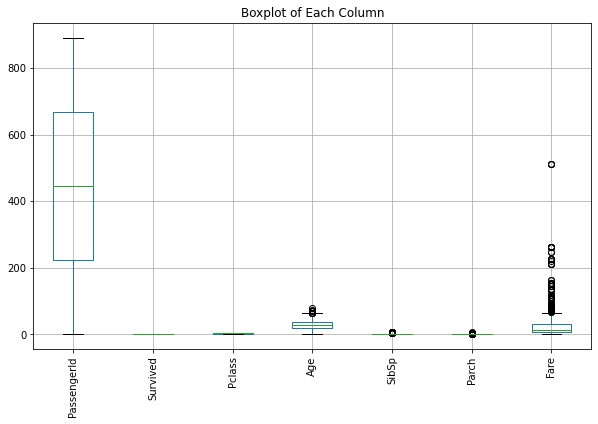

In [240]:
plt.figure(figsize=(10, 6))
titanic.boxplot()
plt.title("Boxplot of Each Column")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [241]:
def boundaries(titanic,variables):
    q1=titanic[variables].quantile(.25)
    q3=titanic[variables].quantile(.75)
    IQR=q3-q1
    lower_margin=q1-1.5*IQR
    upper_margin=q3+1.5*IQR
    
    return lower_margin,upper_margin

In [242]:
lower_limit,upper_limit=boundaries(titanic,'Age')
print('upper limit for the age attribute is', upper_limit)
print('lower limit for the age attribute is', lower_limit)

upper limit for the age attribute is 64.8125
lower limit for the age attribute is -6.6875


In [243]:
outliers_age=np.where(titanic['Age']>upper_limit,True,np.where(titanic['Age']<lower_limit,True,False))

In [244]:
outliers_age

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [245]:
titanic.shape  #before removing outliers

(891, 12)

In [246]:
titanic1=titanic.loc[~(outliers_age),]

In [247]:
titanic1.shape  #after removing outliers

(880, 12)

(array([ 47.,  24.,  93., 137., 145.,  91.,  62.,  58.,  24.,  22.]),
 array([ 0.42 ,  6.778, 13.136, 19.494, 25.852, 32.21 , 38.568, 44.926,
        51.284, 57.642, 64.   ]),
 <BarContainer object of 10 artists>)

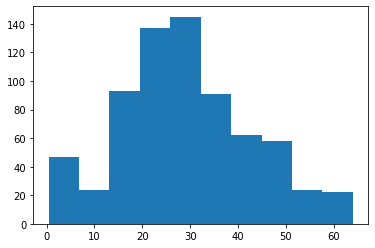

In [248]:
plt.hist(titanic1['Age'])

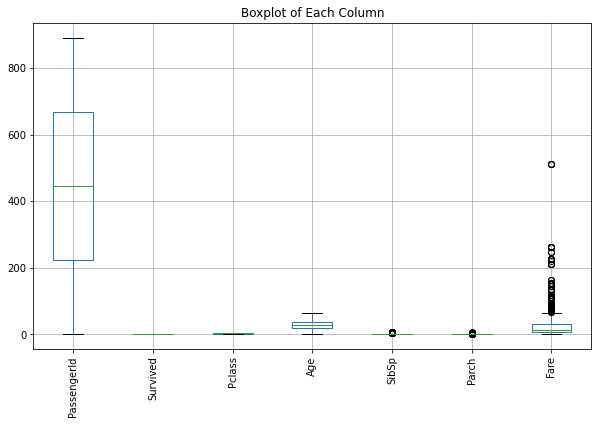

In [249]:
plt.figure(figsize=(10, 6))
titanic1.boxplot()
plt.title("Boxplot of Each Column")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [250]:
lower_limit1,upper_limit1=boundaries(titanic1,'Fare')
print('upper limit for the fare attribute is', upper_limit1)
print('lower limit for the fare attribute is', lower_limit1)

upper limit for the fare attribute is 65.62344999999999
lower limit for the fare attribute is -26.70575


In [251]:
outliers_fare=np.where(titanic1['Fare']>upper_limit,True,np.where(titanic1['Fare']<lower_limit,True,False))

In [252]:
titanic2=titanic1.loc[~(outliers_fare),]

In [253]:
titanic2.shape

(763, 12)

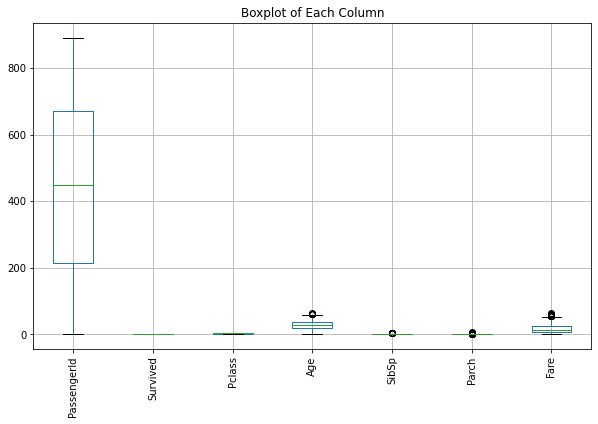

In [254]:
plt.figure(figsize=(10, 6))
titanic2.boxplot()
plt.title("Boxplot of Each Column")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [255]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
titanic2.drop('Cabin',axis=1,inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [257]:
#Dropping the columns with missing values

In [258]:
titanic2.dropna(inplace=True)

<ipython-input-258-4f3d73808c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic2.dropna(inplace=True)


<AxesSubplot:>

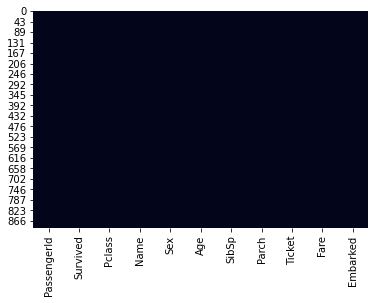

In [259]:
sns.heatmap(titanic2.isnull(),cbar=False)

In [260]:
titanic2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [261]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


# Encoding the Categorical columns

In [262]:
titanic2.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':'2'}}, inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [263]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0


# Separating features and target

In [264]:
x=titanic2.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [265]:
x.head(100)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
6,1,0,54.0,0,0,51.8625,0
...,...,...,...,...,...,...,...
141,3,1,22.0,0,0,7.7500,0
142,3,1,24.0,1,0,15.8500,0
143,3,0,19.0,0,0,6.7500,2
144,2,0,18.0,0,0,11.5000,0


In [266]:
y=titanic2['Survived']

In [267]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         3    0  22.0      1      0   7.2500        0
2         3    1  26.0      0      0   7.9250        0
3         1    1  35.0      1      0  53.1000        0
4         3    0  35.0      0      0   8.0500        0
6         1    0  54.0      0      0  51.8625        0
..      ...  ...   ...    ...    ...      ...      ...
885       3    1  39.0      0      5  29.1250        2
886       2    0  27.0      0      0  13.0000        0
887       1    1  19.0      0      0  30.0000        0
889       1    0  26.0      0      0  30.0000        1
890       3    0  32.0      0      0   7.7500        2

[601 rows x 7 columns]


In [268]:
print(y)

0      0
2      1
3      1
4      0
6      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 601, dtype: int64


# Splitting the data into training and test data

In [366]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [367]:
print(x.shape,X_train.shape,X_test.shape)

(601, 7) (480, 7) (121, 7)


# Model Training

In [368]:
rf = RandomForestClassifier()

In [369]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

# Model Evaluation

In [370]:
X_trainpred=rf.predict(X_train)

In [371]:
train_accuracy_score=accuracy_score(Y_train,X_trainpred)

In [372]:
print(train_accuracy_score)

0.9875


In [373]:
X_testpred=rf.predict(X_test)

In [374]:
print(X_testpred)

[0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0]


In [375]:
test_accuracy_score=accuracy_score(Y_test,X_testpred)

In [376]:
print(test_accuracy_score)

0.8016528925619835


In [377]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [378]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,2.444260,0.329451,28.244176,0.494176,0.400998,18.453868
std,0.728449,0.470405,13.466102,0.962834,0.850842,13.411723
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.000000,0.000000,0.000000,7.925000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,13.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,26.000000
max,3.000000,1.000000,64.000000,5.000000,6.000000,63.358300


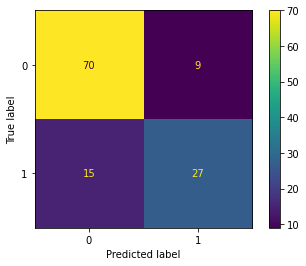

In [379]:
cm = confusion_matrix(Y_test,X_testpred)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()